### Laboratorio 2 – Proyecto de Predicción de Predicción de Bicicletas

En esta sección ud. estará a cargo de evaluar como se puede realizar la predicción de bicicletas de un local de alquiler.  Como científico de datos tiene la labor de predecir la siguiente demanda del local por medio de un modelo de machine learning utilizando scikit-learn.

### Copiando el Dataset al Computador

Primero debemos adquirir el dataset.  Nuestro dataset a descargar está en la siguiente dirección:
- https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip

### Descargar los datos

Haremos una función para descargar los datos de la web, esto es muy útil para futuro.

In [2]:
import os
from six.moves import urllib

DS_EXTRACT_PATH = "C:/Users/sleon/Desktop/bike_rental"
DS_URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip"


def download_dataset(dataset_url=DS_URL, dataset_pc_path=DS_EXTRACT_PATH):
    if not os.path.isdir(dataset_pc_path):
        os.makedirs(dataset_pc_path)
    parts = os.path.split(dataset_url)
    zipname = parts[-1]
    zip_path = os.path.join(dataset_pc_path, zipname)
    urllib.request.urlretrieve(dataset_url, zip_path)

In [3]:
# Salida Esperada:
# Dataset en formato zip descargado en: <esta_carpeta>/datasets/capitalbikeshare/<nombre_del_zip>
download_dataset()

### Descomprimir los datos

Haremos una función para descomprimir el dataset en esta carpeta y finalmente borraremos el zip file.

In [4]:
import os
import zipfile

def unzip_dataset(zip_file_path, destination_path):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(destination_path)
    print("Extraccion Completa.")

def delete_zip(zip_file_path):
    if os.path.exists(zip_file_path):
        os.remove(zip_file_path)
        print("Zip files deleted successfully.")
    else:
        print("Zip files does not exist.")

zip_file_path = "C:/Users/sleon/Desktop/bike_rental/Bike-Sharing-Dataset.zip"
destination_path = 'C:/Users/sleon/Desktop/bike_rental/dataset'


In [5]:
unzip_dataset(zip_file_path, destination_path)
delete_zip(zip_file_path)

## Salida Esperada:
# Dataset en formato csv descomprimodo en: <esta_carpeta>/datasets/capitalbikeshare/
# archivos: hour.csv, day.csv, Readme.txt

Extraccion Completa.
Zip files deleted successfully.


### Cargar y explorar el dataset

Ahora cargue el dataset y explore las diferentes variables del dataset:
- hour.csv

Cargar el dataset con pandas

In [6]:
import pandas as pd
 
def load_bike_hourly_data():
    file_path_hour= "C:/Users/sleon/Desktop/bike_rental/dataset/hour.csv"
    hourdataset = pd.read_csv(file_path_hour)
    return hourdataset

Explorar las primeras 48 filas

In [7]:
bikeshare = load_bike_hourly_data()

def print_hourdataset(hourdataset):
    print(hourdataset.head(48))

print_hourdataset(bikeshare)   


    instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0         1  2011-01-01       1   0     1   0        0        6           0   
1         2  2011-01-01       1   0     1   1        0        6           0   
2         3  2011-01-01       1   0     1   2        0        6           0   
3         4  2011-01-01       1   0     1   3        0        6           0   
4         5  2011-01-01       1   0     1   4        0        6           0   
5         6  2011-01-01       1   0     1   5        0        6           0   
6         7  2011-01-01       1   0     1   6        0        6           0   
7         8  2011-01-01       1   0     1   7        0        6           0   
8         9  2011-01-01       1   0     1   8        0        6           0   
9        10  2011-01-01       1   0     1   9        0        6           0   
10       11  2011-01-01       1   0     1  10        0        6           0   
11       12  2011-01-01       1   0     1  11       

### Desplegar información del dataset

Despliegue información escencial del dataset

In [328]:
bikeshare = load_bike_hourly_data()

def print_hourdataset_info(hourdataset):
    print(hourdataset.info())

print_hourdataset_info(bikeshare) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


### Visualizando el dataset
El dataset, como observó, tiene el número de personas para cada hora del día desde Enero del 2011 hasta Diciembre 2017. El número de personas que manejan se divide entre casuales y registrados sumados en la columna 'cnt'.

- Grafique el número de manejadores de bicicleta de los primeros 10 días del dataset.  Observe el dataset y note que el día se divide en 24 horas.  Puede ver la cantidad de rentas por horas allí.

El dataset es difícil de analizar normalmente, tiene altibajos, en especial cuando las personas van del trabajo a la casa y los fines de semana.  De las columnas anteriores también tenemos velocidad de viento, humedad, temperatura.  Todo esto afecta el alquiler de las bicicletas.  Trataremos de capturar estas características con un modelo.

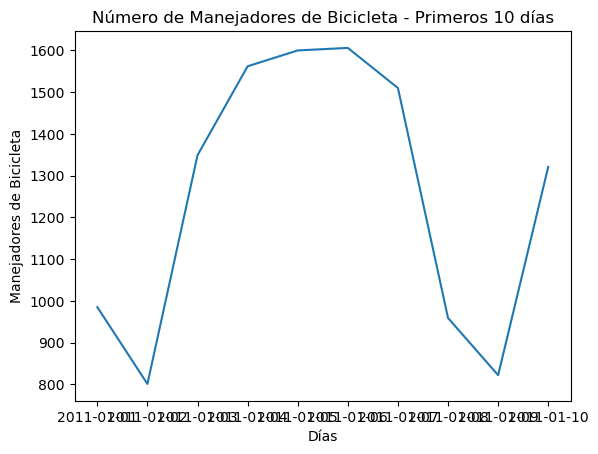

In [396]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plt_daily():
    file_path_daily = "C:/Users/sleon/Desktop/bike_rental/dataset/day.csv"
    dailydataset = pd.read_csv(file_path_daily)
    subset = dailydataset.head(10)
    dias = subset['dteday']
    manejadores = subset['cnt']
    plt.plot(dias, manejadores)
    plt.xlabel('Días')
    plt.ylabel('Manejadores de Bicicleta')
    plt.title('Número de Manejadores de Bicicleta - Primeros 10 días')
    plt.show()
    
plt_daily()



### Gane más información de la distribución del dataset

Simplemente grafique con hist() para verificar/validar la distribución de los datos y ganar más información del dataset

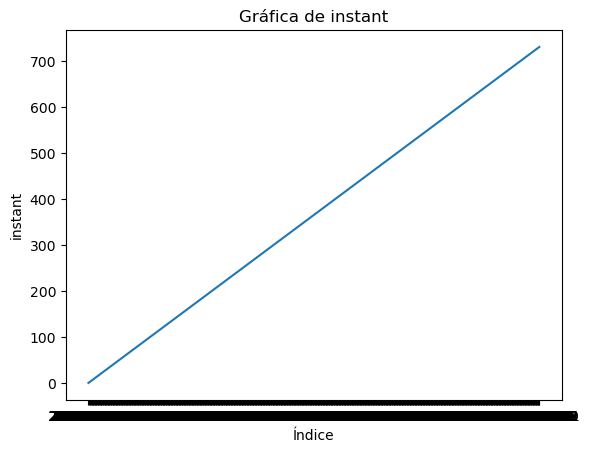

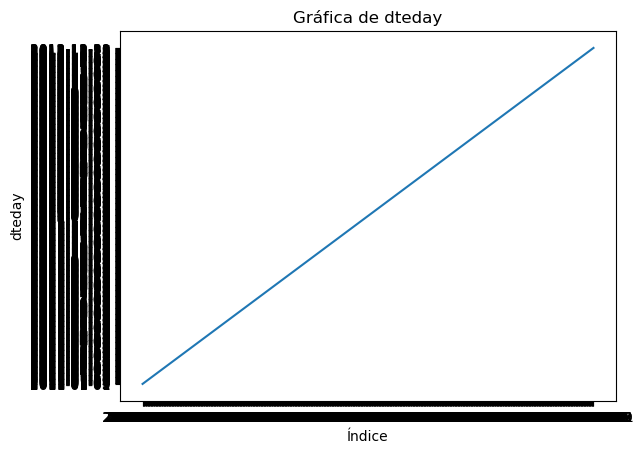

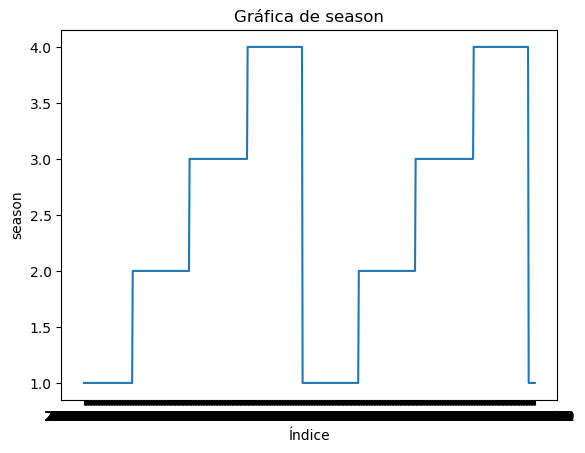

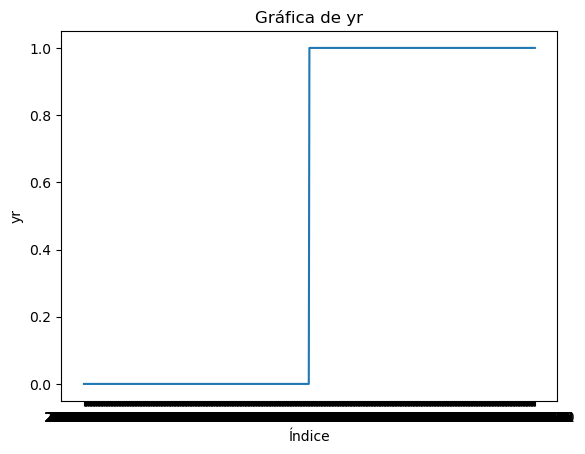

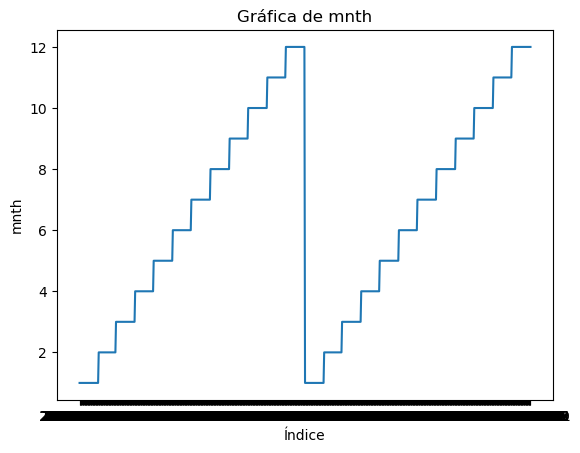

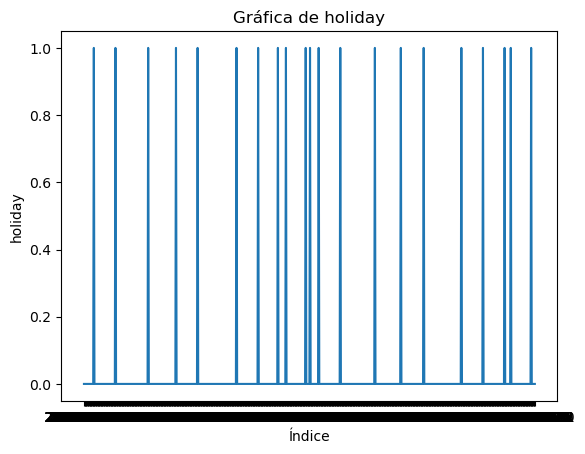

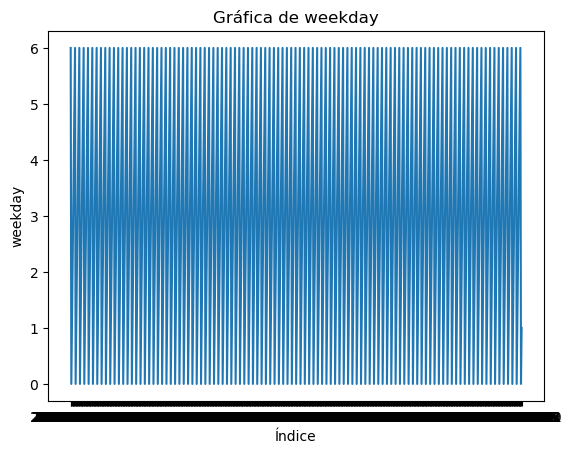

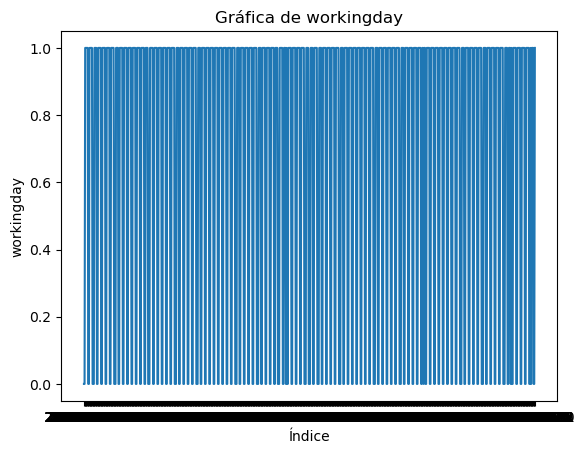

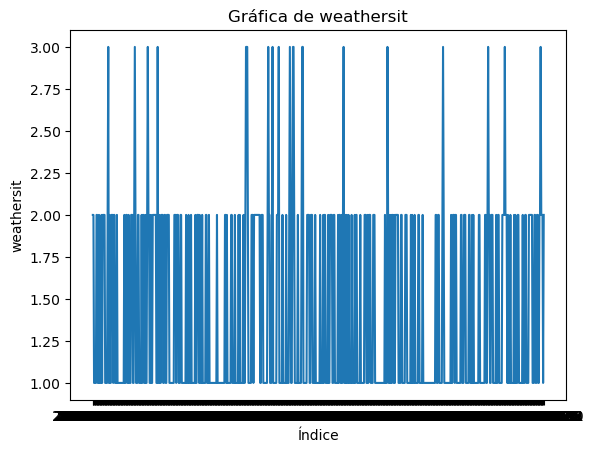

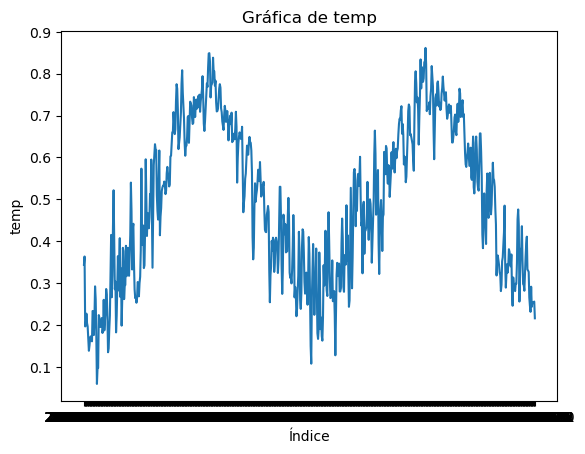

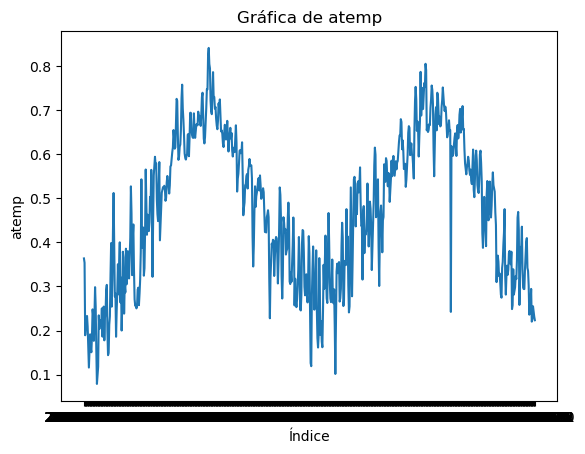

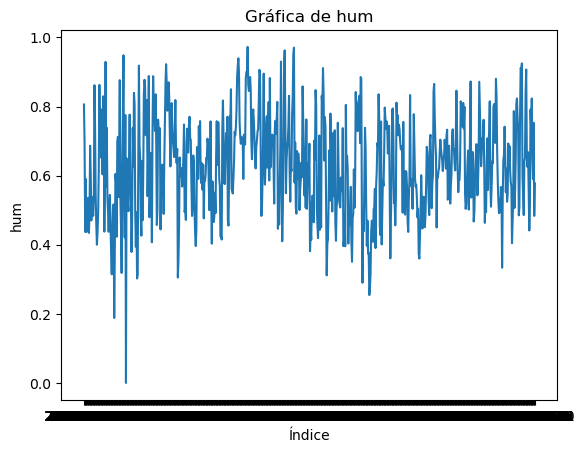

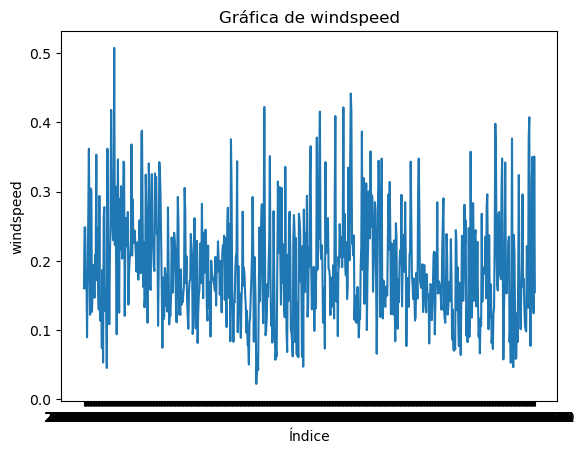

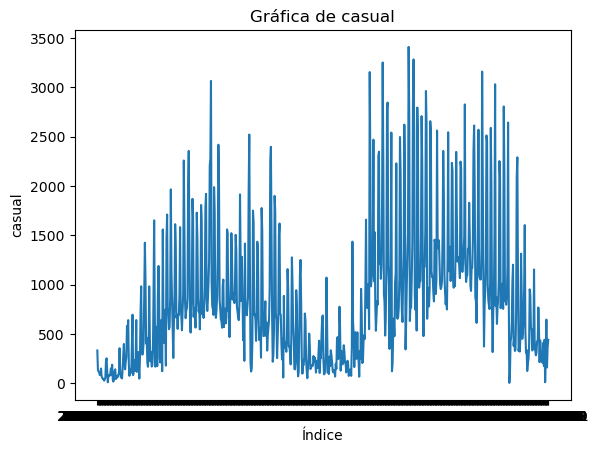

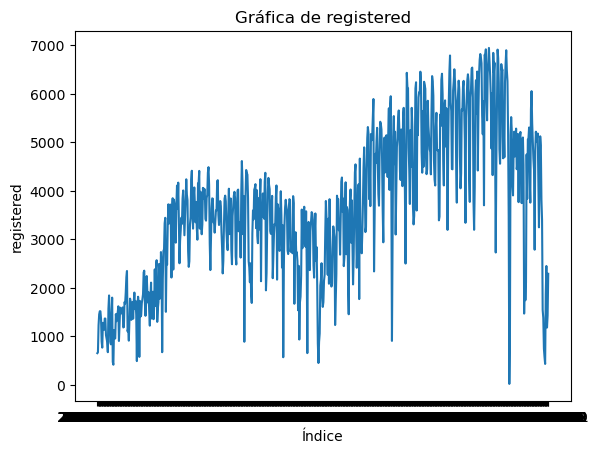

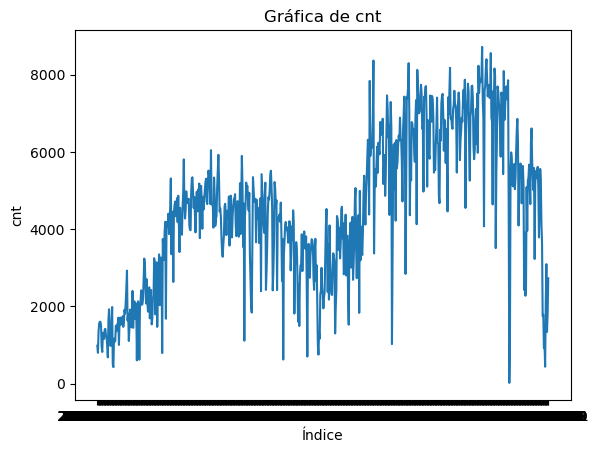

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

def plt_daily_all():
    file_path_daily = "C:/Users/sleon/Desktop/bike_rental/dataset/day.csv"
    dailydataset = pd.read_csv(file_path_daily)
    columnas = dailydataset.columns.tolist()
    dias = dailydataset['dteday']
    for columna in columnas:
        plt.figure()
        plt.plot(dias, dailydataset[columna])
        plt.xlabel('Índice')
        plt.ylabel(columna)
        plt.title(f'Gráfica de {columna}')
        plt.show()

plt_daily_all()


### Variables Dummy - Transformación de Data Categórica

Los datos categóricos como temporada, mes, y año deben ser transformados a números debido a que los modelos solo trabajan con esto.  También tendremos variables binarias.  La acción la realizaremos com pandas y la función:
 - get_dummies()
 - columnas dummy = 'season', 'weathersit', 'mnth', 'hr', 'weekday'
 - columnas a borrar = 'instant', 'dteday', 'season', 'weathersit', 'weekday', 'atemp', 'mnth', 'workingday', 'hr'

In [28]:
file_path_daily = "C:/Users/sleon/Desktop/bike_rental/dataset/day.csv"
dailydataset = pd.read_csv(file_path_daily)
dummy_cols=dailydataset.columns.tolist()
for each in dummy_cols:
    dummies = pd.get_dummies(bikeshare[each], prefix=each, drop_first=False)
    bikeshare = pd.concat([bikeshare, dummies], axis=1)

drop_cols = ['instant', 'dteday', 'season', 'weathersit', 'weekday', 'atemp', 'mnth', 'workingday', 'hr']
data = bikeshare.drop(drop_cols, axis=1)
data.head()

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,instant_1,instant_2,...,cnt_943,cnt_948,cnt_953,cnt_957,cnt_963,cnt_967,cnt_968,cnt_970,cnt_976,cnt_977
0,0,0,0.24,0.81,0.0,3,13,16,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0.22,0.80,0.0,8,32,40,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0.22,0.80,0.0,5,27,32,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0.24,0.75,0.0,3,10,13,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0.24,0.75,0.0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Escalar el Dataset
- variables a escalar = 'casual', 'registered', 'cnt', 'temp', 'hum', 'windspeed'

In [9]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

file_path_daily = "C:/Users/sleon/Desktop/bike_rental/dataset/day.csv"
dailydataset = pd.read_csv(file_path_daily)

var_scal = ['casual', 'registered', 'cnt', 'temp', 'hum', 'windspeed']

scaler = StandardScaler()

scaler.fit(dailydataset[var_scal])

dailydataset[var_scal] = scaler.transform(dailydataset[var_scal])

### Separación del Dataset
Separar el dataset en Training y Test
- 20% test set
- Campos de Test = 'cnt', 'casual', 'registered'
- Campos de Train = todos los demas

In [30]:
# Separate the data into features and targets
from sklearn.model_selection import train_test_split
import pandas as pd

file_path_daily = "C:/Users/sleon/Desktop/bike_rental/dataset/hour.csv"
dailydataset = pd.read_csv(file_path_daily)

camp_test = ['cnt', 'casual', 'registered']
X_test = dailydataset[camp_test]
y_test = dailydataset['cnt']

camp_train = [col for col in dailydataset.columns if col not in camp_test]
X_train = dailydataset[camp_train]
y_train = dailydataset['cnt']

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

### Entrenamiento

Entrenar el modelo basado en el regresor KNeighobrsRegressor
- n_neighbors = 4
- n_jobs = 4

In [ ]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 

regressor = KNeighborsRegressor(n_neighbors=4, n_jobs=4)
regressor.fit(X_train, y_train)


### Guardar el Modelo 

Una parte importante es que luego de entrenar podríamos guardar el modelo.  Este paso se realiza luego de haber evaluado varios y validar que cumple con las métricas.  A manera de prueba lo realizaremos antes, sin embargo recordar que es parte de los últimos pasos.

In [38]:
# Guardar el modelo
import pickle

with open('modelo_knn.pkl', 'wb') as archive_1:
    pickle.dump(regressor, archive_1)

### Cargar el Modelo

Cuando poseemos la aplicación final, por ejemplo una aplicación por celular o una aplicación web, podemos 'consumir' el modelo llamandolo para realizar nuestras predicciones.  Para esto el modelo debe estar disponible desde una ubicación conocida en la máquina o dispositivo a ejecutar.

In [42]:
import pickle
with open('modelo_knn.pkl', 'rb') as archiv_1:
    model_charge = pickle.load(archiv_1)

### Realizar predicciones

Realizar las predicciones con el modelo de los datos de test

In [ ]:
import pickle
y_pred = model_charge.predict(X_test)

### Evaluar el modelo por medio de métricas

Evaluar el modelo por medio de las métricas de error medio cuadrado

NameError: name 'model_charge' is not defined

### Graficar los resultados

Graficar los resultados de la predicción vs los resultados de las pruebas

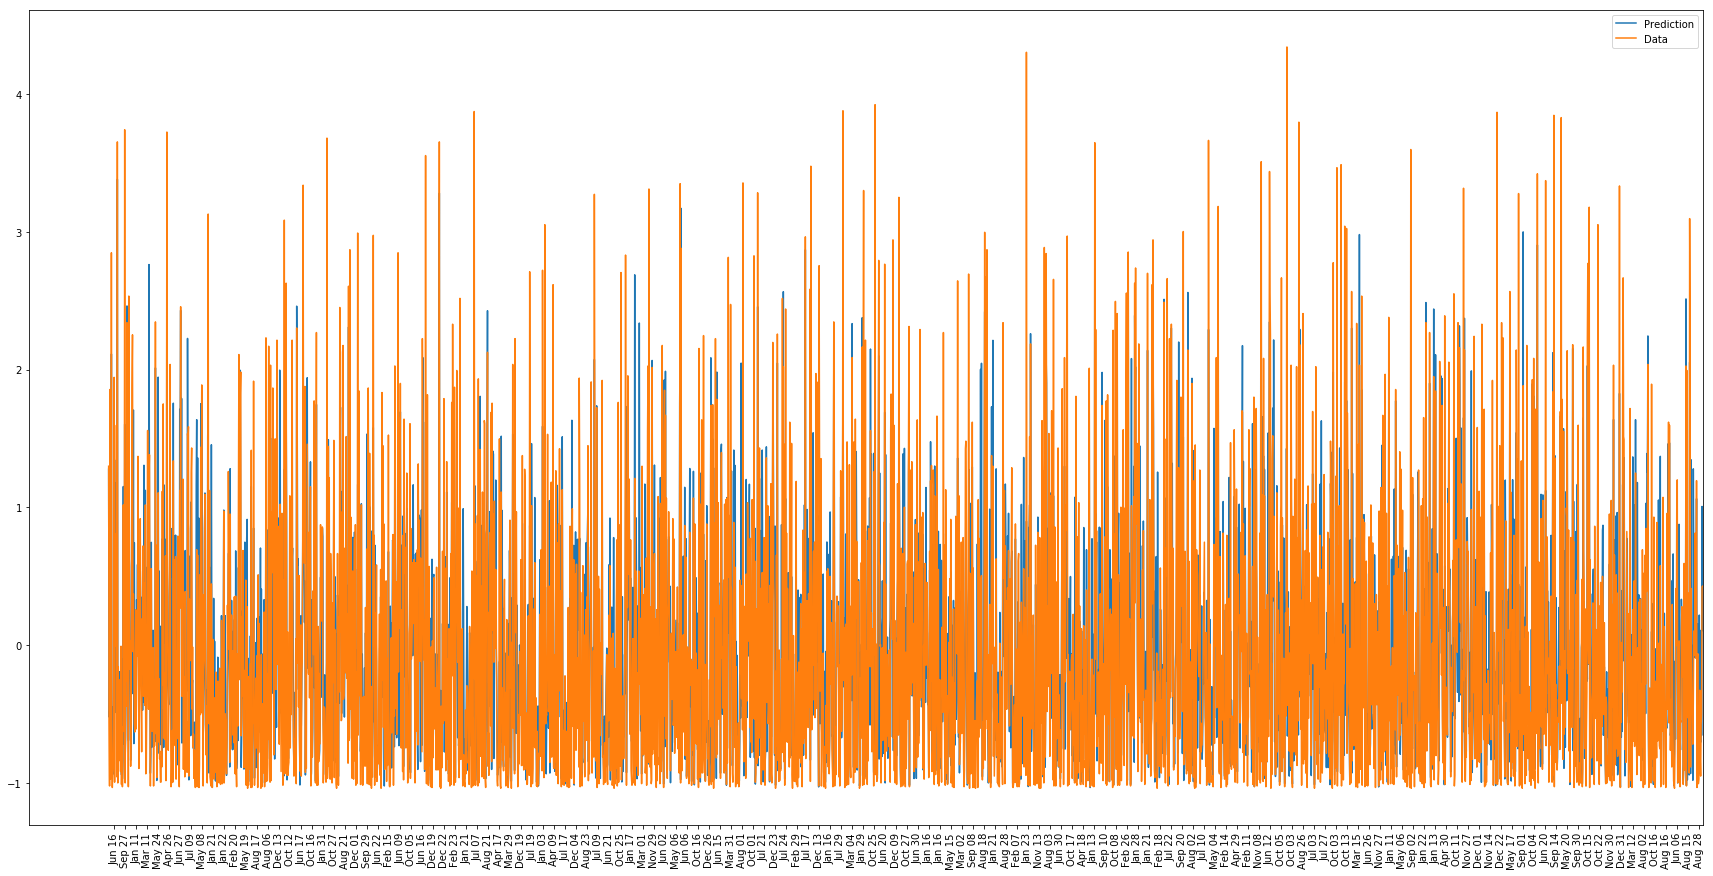

In [18]:
# PUEDE UTILIZAR ESTE CODIGO O HACER EL SUYO

# SU CODIGO AQUI

fig, ax = pyplot.subplots(figsize=(30,15))


ax.plot(prediction[:,0], label='Prediction')
ax.plot(Ytest.cnt.values, label='Data')
ax.set_xlim(right=len(prediction))
ax.legend()

dates = pd.to_datetime(bikeshare.loc[Ytest.index]['dteday'])
dates = dates.apply(lambda d: d.strftime('%b %d'))
ax.set_xticks(np.arange(len(dates))[12::24])
_ = ax.set_xticklabels(dates[12::24], rotation=90)